In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearnex import patch_sklearn
patch_sklearn(verbose=False)
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.ensemble import RandomForestClassifier
import scipy.stats as stats
import ourfunctions

In [2]:
X = pd.read_csv('data/Training-set-values.csv')
y = pd.read_csv('data/Training-set-labels.csv')
y = pd.DataFrame(LabelEncoder().fit_transform(y.status_group))

X['date_recorded'] = pd.to_datetime(X['date_recorded']).astype(np.int64)

#### Preprocessors

In [3]:
# Super basic numeric transformer

numeric_transformer = Pipeline(
    steps=[('imputer', SimpleImputer(strategy='median'))]
)

numeric_preprocessor = ColumnTransformer(
    transformers=[
        ("numeric", numeric_transformer, make_column_selector(dtype_include=np.number)),
    ]
)

### Models

In [4]:
knn = {'classifier': KNeighborsClassifier(n_jobs=3), 'preprocessor': None}
log_reg_basic = {'classifier': LogisticRegression(C=1e6, n_jobs=3), 'preprocessor': None}
RandomFM_basic = {'classifier': RandomForestClassifier(max_depth=20, min_samples_split=4, n_jobs=3), 'preprocessor': numeric_preprocessor}
RandomFM_all_cols = {'classifier': RandomForestClassifier(max_depth=20, min_samples_split=4, n_jobs=3), 'preprocessor': None}
RandomFM_searched = {'classifier': RandomForestClassifier(n_jobs=3, **{'n_estimators': 186, 'min_samples_split': 2, 'max_depth': 49, 'criterion': 'entropy'}), 'preprocessor': None} # Included for RandomCVSearch later on

models = {'knn': knn, 'log_reg_basic': log_reg_basic, 'RandomFM_basic': RandomFM_basic, 'RandomFM_all_cols': RandomFM_all_cols, 'RandomFM_searched': RandomFM_searched}

### Modeler

In [5]:
model_run = ourfunctions.Modeler(models, X=X, y=y)

# after the model_run object is created so we can add onto the default preprocessor.
log_reg_regularized = {'classifier': LogisticRegression(n_jobs=3), 'preprocessor': model_run.create_default_prep(num_add=[('scaling', StandardScaler())])}
model_run.add_model('log_reg_regularized', log_reg_regularized)

### Train and Test

In [6]:
model_run.train_all(cv=False)
model_run.test_all()

/home/thedefect/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/thedefect/anaconda3/envs/learn-env/lib/python3.8/site-packages/daal4py/sklearn/linear_model/logistic_path.py:453: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/thedefect/anaconda3/envs/learn-env/lib/python3.8/site-packages/daal4py/sklearn/ensemble/_forest.py:646: DataConversionWarning: A column-vector y was passed when a 1d array was e

### Plot Them!

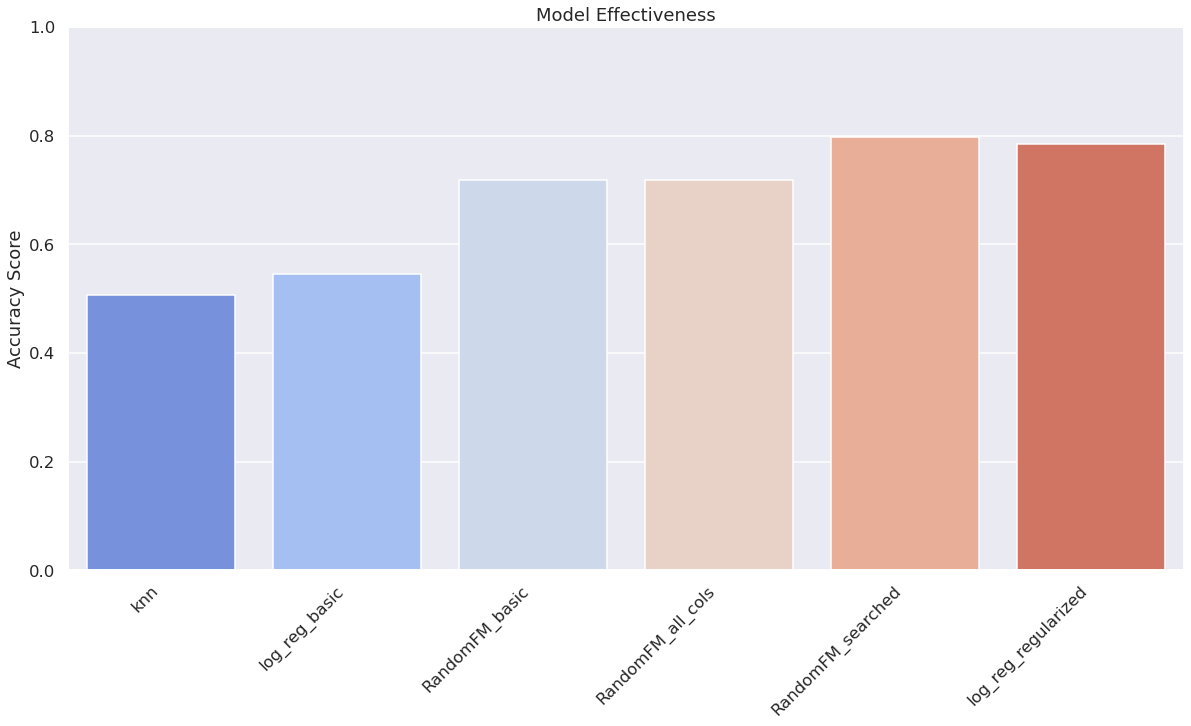

In [7]:
model_run.plot_models(save='tuesday_models_graph')
